<a href="https://colab.research.google.com/github/Saron773/Winter-2022/blob/main/Iris_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].nunique()

3

In [5]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.set_index('Id', inplace=True)

In [8]:
#df.set_index('Id', inplace= '')

In [9]:
df['Species'] = df['Species'].apply(lambda title:title.split('-')[1])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


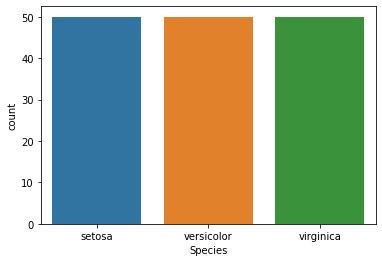

In [11]:
sns.countplot(x='Species', data = df)


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scalar = StandardScaler()

In [14]:
scalar.fit(df.drop('Species', axis = 1))

StandardScaler()

In [15]:
scaled_features = scalar.transform(df.drop('Species', axis =1))

In [16]:
df_feature = pd.DataFrame (scaled_features, columns = df.columns[:-1])

In [17]:
df_feature


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, df['Species'], test_size = 0.3, random_state = 0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors =1)

In [21]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
predict = knn.predict(x_test)

In [23]:
predict

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print (confusion_matrix(y_test,predict))

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


Text(0.5, 1.0, 'Accuracy Score: 0.9555555555555556')

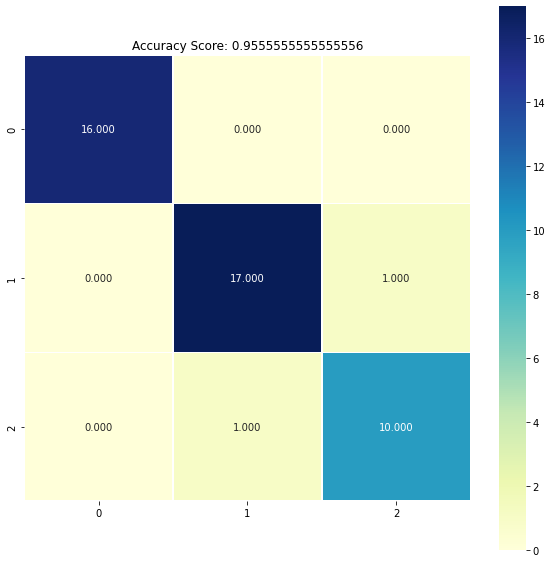

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predict), annot = True, fmt = '.3f', linewidths=.5, square=True, cmap="YlGnBu")
plt.ylabel = ('Actual Label')
plt.xlabel = ('Predicted Label')
all_sample_title = f'Accuracy Score: {knn.score(x_test, y_test)}'
plt.title(all_sample_title, size =12)

In [27]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.94      0.94        18
   virginica       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



#Calculating for K = 7

In [28]:
knn2 = KNeighborsClassifier(n_neighbors =7)

In [29]:
knn2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [30]:
predict2 = knn2.predict(x_test)

In [31]:
predict2

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print (confusion_matrix(y_test,predict))

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


Text(0.5, 1.0, 'Accuracy Score: 0.9777777777777777')

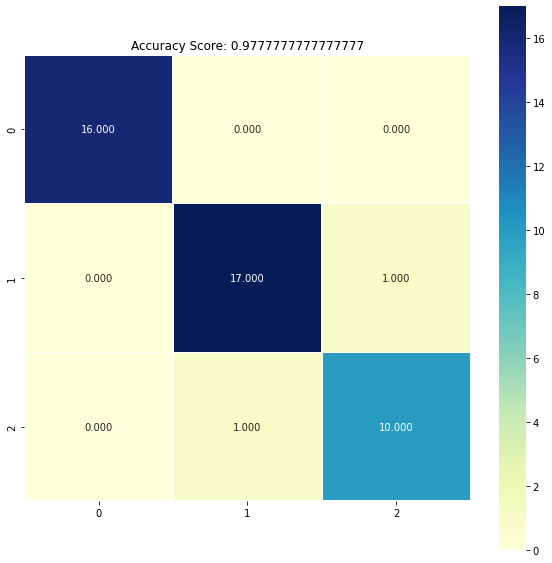

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, predict), annot = True, fmt = '.3f', linewidths=.5, square=True, cmap="YlGnBu")
plt.ylabel = ('Actual Label')
plt.xlabel = ('Predicted Label')
all_sample_title = f'Accuracy Score: {knn2.score(x_test, y_test)}'
plt.title(all_sample_title, size =12)

#Testing Accuracy for K Value

In [35]:
from sklearn import metrics

In [36]:
score = []

In [37]:
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  score.append(metrics.accuracy_score(y_test, y_pred))

print(score)

[0.9555555555555556, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111, 0.8888888888888888, 0.8888888888888888, 0.8666666666666667, 0.8888888888888888]


TypeError: ignored

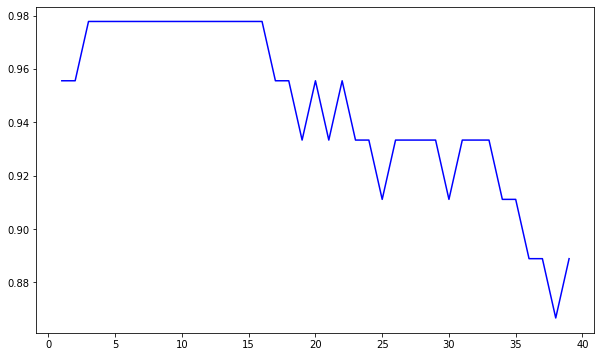

In [39]:
plt.figure(figsize =(10,6))
plt.plot(range(1,40), score, color ="blue")
plt.xlabel('Value of k for KNN')
plt.ylabel('testing Accuarcy')

#Calculating accuarcy for K =15

In [40]:
knn3 = KNeighborsClassifier(n_neighbors =15)

In [41]:
knn3.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [43]:
predict3 = knn3.predict(x_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print (confusion_matrix(y_test,predict))

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


In [46]:
print(classification_report(y_test,predict3))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#Error Rate and K Value

In [47]:
error_rate = []
for i in range (1,40):

  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error_rate.append(np.mean(pred_i != y_test))

TypeError: ignored

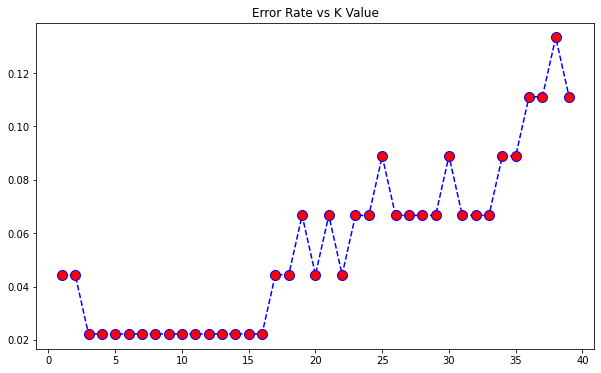

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle='dashed', 
         marker = 'o', markerfacecolor = 'red', markersize =10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')